In [1]:
import os
import re
import time
import torch
import torch.nn as nn
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence
from torch.nn.utils.rnn import pad_packed_sequence
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.manual_seed(1)

237303
(153, 1550)
(1550, 153)


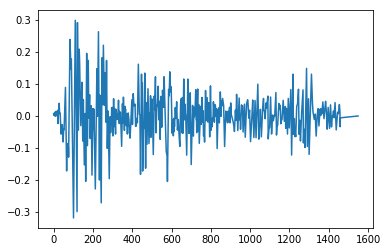

origin:
[1.08796486e+69 1.08808383e+69 1.08908017e+69 1.08885479e+69
 1.08931804e+69 1.08768576e+69 1.08868542e+69 1.08900052e+69
 1.08920405e+69 1.08833844e+69 1.08931116e+69 1.08477810e+69
 1.08899540e+69 1.08901423e+69 1.08931106e+69 1.08882217e+69
 1.08874177e+69 1.08911277e+69 1.08856633e+69 1.08930794e+69
 1.08911155e+69 1.08675478e+69 1.08931483e+69 1.08868772e+69
 1.08920844e+69 1.08918387e+69 1.08928732e+69 1.08931747e+69
 1.08714420e+69 1.08644231e+69 1.08928509e+69 1.08633191e+69
 1.08819950e+69 1.08655127e+69 1.08804704e+69 1.08569494e+69
 1.08744433e+69 1.08603763e+69 1.08834232e+69 1.08921891e+69
 1.08758280e+69 1.08907671e+69 1.08851018e+69 1.08926884e+69
 1.08931794e+69 1.08838769e+69 1.08853736e+69 1.08932341e+69
 1.08363488e+69 1.08899908e+69 1.08884836e+69 1.08910354e+69
 1.08924674e+69 1.08925671e+69 1.08629646e+69 1.08895196e+69
 1.08800878e+69 1.08927160e+69 1.08723374e+69 1.08895762e+69
 1.08890483e+69 1.08873299e+69 1.08834550e+69 1.08844185e+69
 1.08912512e+69 

In [2]:
#just load the data
import preprocess
import utils.load_acc

stiffness_o, mass_o = preprocess.task()

acc = utils.load_acc.task()

earthquake = utils.load_acc.get_earthquake_data()

plt.plot(earthquake)

plt.show()

#extra process
from sklearn.preprocessing import StandardScaler

print("origin:")
print(stiffness_o[0])
print(mass_o[0])

ss_s, ss_m = StandardScaler(), StandardScaler()
ss_s.fit(stiffness_o);ss_m.fit(mass_o)

stiffness, mass = ss_s.transform(stiffness_o), ss_m.transform(mass_o)

print("after: ")
print(stiffness[0], mass[0])



In [4]:
print(acc[0])
print(acc.shape)

[ 0.00000e+00  6.30000e-03 -1.68000e+02 -1.13114e+02  6.30000e-03
 -1.98244e+01  8.71537e+01  6.30000e-03  3.13184e+02  7.27456e+01
  6.30000e-03 -1.53335e+02 -5.55194e+01  6.30000e-03  2.83458e+02
  1.41219e+02  6.30000e-03 -1.71571e+02 -1.80472e+02  6.30000e-03
 -1.73125e+02  6.19608e+01  6.30000e-03  9.70838e+01 -8.04499e+01
  6.30000e-03 -3.05215e+02 -2.96808e+00  6.30000e-03  3.23998e+02
  8.07736e+01  6.30000e-03 -2.12134e+00  3.94145e+01  6.30000e-03
  4.72737e+01 -4.63711e+01  2.72007e+02  2.19947e+02 -7.42040e+01
 -2.76531e+02 -3.62425e+02 -3.00908e+02 -2.14472e+02  6.44943e+01
 -8.35289e+01 -3.36124e+01 -2.46640e+02 -3.21768e+02 -2.09996e+02
  1.63591e+01  2.25088e+02  4.70345e+02  3.47860e+02  2.28231e+02
  1.12243e+02 -9.66123e+00  1.42861e+02  2.79805e+02  2.99119e+02
  4.06714e+02 -9.55119e+01 -7.26624e+01  7.77523e+01 -2.05768e+02
 -2.61901e+02 -3.30812e+02 -6.08604e+02 -3.25945e+02 -2.50724e+02
 -1.95113e+02  1.33126e+02 -4.12690e+01 -2.13317e+01  5.09380e+01
 -2.69079e

<class 'numpy.ndarray'>
153
(1, 153)
(6, 153)
(1550, 153)


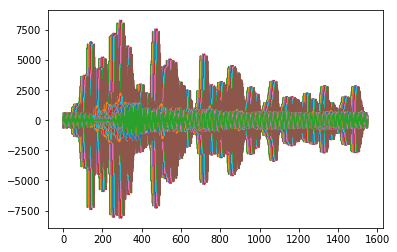

In [5]:
# trans to torch tensor
print(type(stiffness[0]))
print(len(mass[0]))

s = np.array([stiffness[0]])

print(s.shape)
for i in range(1, 3):
    s= np.concatenate((s, np.array([stiffness[i]])), axis=0)

for i in range(3):
    s = np.concatenate((s, np.array([mass[i]])), axis=0)

print(s.shape)

print(acc.shape)

src = torch.tensor(s, dtype=torch.float64)

tgt = torch.tensor(acc, dtype=torch.float64)

src = torch.unsqueeze(src, dim=1)

plt.plot(acc)

plt.show()


#tgt = torch.unsqueeze(tgt, dim=1)

#print(src.shape, tgt.shape)

#dataloader

#print(src.shape)
#print(tgt.shape)

#for i in range(4):
#    src = torch.cat((src, src), 1)
#
#for i in range(4):
#    tgt = torch.cat((tgt, tgt), 1)
#
#print(src.shape)
#print(tgt.shape)




torch.Size([6, 1, 153]) torch.Size([1550, 153])
epoch:  0 current_loss:  159708782.1953125
epoch:  1 current_loss:  159660260.25
epoch:  2 current_loss:  159654511.07421875
epoch:  3 current_loss:  159652473.5859375
epoch:  4 current_loss:  159650283.27734375
epoch:  5 current_loss:  159687266.01171875
epoch:  6 current_loss:  159978387.10546875
epoch:  7 current_loss:  159978622.3984375
epoch:  8 current_loss:  159979977.0390625
epoch:  9 current_loss:  159979455.171875
epoch:  10 current_loss:  159977310.81640625
epoch:  11 current_loss:  159978177.2421875
epoch:  12 current_loss:  159978052.0859375
epoch:  13 current_loss:  159977379.78515625
epoch:  14 current_loss:  159978284.68359375
epoch:  15 current_loss:  159978260.95703125
epoch:  16 current_loss:  159978881.69140625
epoch:  17 current_loss:  159977340.81640625
epoch:  18 current_loss:  159978807.0234375
epoch:  19 current_loss:  159978770.81640625


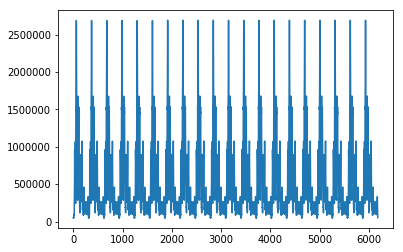

In [6]:
#test model
def pretty_time(time, degree=1):
    return str(int(time // 60)) + "m" + str(round(time % 60, degree)) if time > 60 else round(time, degree)

from net.model import FesNet

net = FesNet(element_dim=153)

criterion =  nn.MSELoss()

optimizer = optim.Adam(net.parameters(), lr=0.0005)

start_time = time.time()

loss_list = []

print(src.shape, tgt.shape)

src, tgt = src.float(), tgt.float()

max_length = 5

for epoch in range(20):
    i = 0
    current_loss = 0
    while i + max_length < len(tgt):
        net.zero_grad()

        inputs, targets = tgt[i:i+max_length], tgt[i+1:i+1+max_length]

        inputs, targets = torch.unsqueeze(inputs, dim=1), torch.unsqueeze(targets, dim=1)

        predicts = net(inputs, targets)

        loss = criterion(predicts, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

        i += max_length

        loss_list.append(loss.item())
    
    print("epoch: ", epoch, "current_loss: ", current_loss)

plt.plot(loss_list)

plt.show()



In [22]:
inputs, targets = tgt[:max_length], tgt[1:1+max_length]

inputs, targets = torch.unsqueeze(inputs, dim=1), torch.unsqueeze(targets, dim=1)

probs = net(inputs, targets)

print(probs.shape)

torch.Size([99, 1, 153])


tensor([[[ 0.1644, -0.1398,  4.2101,  ..., -0.3088, -0.4132, -0.3451]],

        [[-0.0076,  0.5217, -3.7770,  ...,  0.1141, -0.0757,  0.3500]],

        [[-0.4275, -0.5502,  3.6970,  ..., -0.2921, -0.2704,  0.2869]],

        ...,

        [[ 0.3176,  0.4051, -3.8375,  ...,  0.4416, -0.0457,  0.3465]],

        [[-0.5134, -0.6379,  1.6162,  ..., -0.2071, -0.6050, -0.4826]],

        [[ 0.2521,  0.3878, -3.9843,  ...,  0.2828,  0.4961,  0.3120]]],
       grad_fn=<NativeLayerNormBackward>)


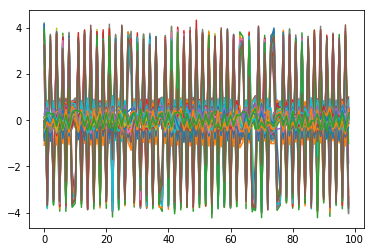

In [23]:

print(probs)
plt.plot(probs.view(99, 153).detach().numpy())

plt.show()